# Common evaluation and diagnostic plots in machine learning

## Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification model. It shows true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).


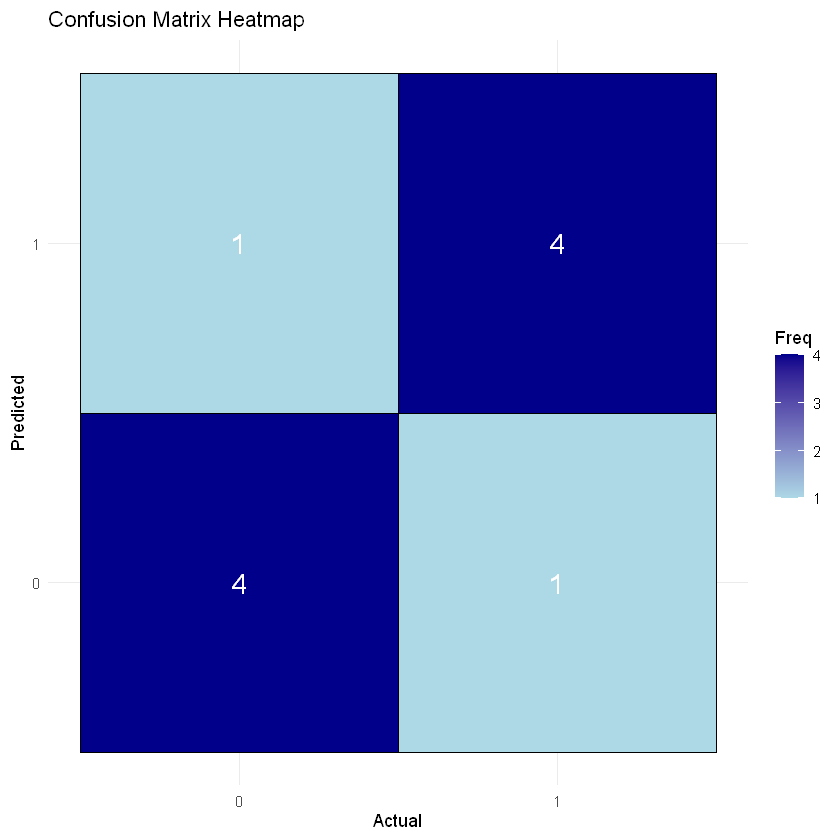

In [4]:
library(ggplot2)

# Example confusion matrix
actual <- c(1,0,1,1,0,1,0,0,1,0)
pred   <- c(1,0,1,0,0,1,1,0,1,0)

cm <- table(Predicted = pred, Actual = actual)

# Convert to data frame for ggplot
cm_df <- as.data.frame(cm)

# Plot heatmap
ggplot(cm_df, aes(x=Actual, y=Predicted, fill=Freq)) +
  geom_tile(color="black") +
  geom_text(aes(label=Freq), vjust=0.5, size=6, color="white") +
  scale_fill_gradient(low="lightblue", high="darkblue") +
  labs(title="Confusion Matrix Heatmap") +
  theme_minimal()


### AUC-ROC Curve

**ROC curve (Receiver Operating Characteristic curve):**
 Plots True Positive Rate (Sensitivity) vs. False Positive Rate (1 - Specificity).

**AUC (Area Under Curve):**
A single number summary of ROC; closer to 1 = better model.

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 1

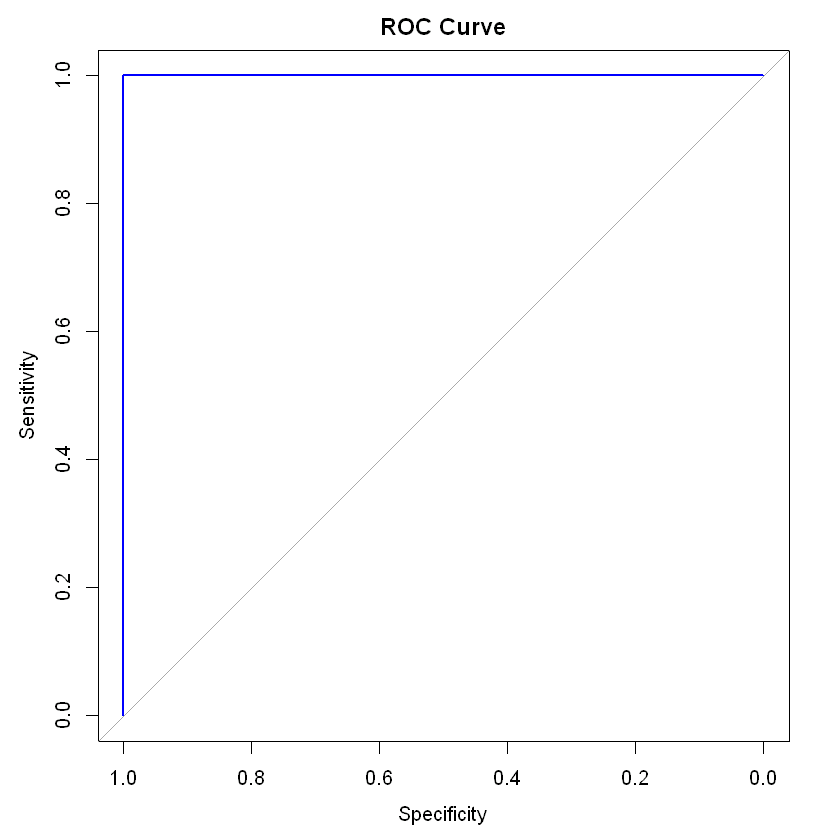

In [2]:
# Install if needed: install.packages("pROC")
library(pROC)

# True labels (0/1) and predicted probabilities
actual <- c(1,0,1,1,0,0,1,0,1,0)
prob   <- c(0.9,0.3,0.8,0.6,0.2,0.4,0.85,0.1,0.7,0.3)

# ROC curve
roc_obj <- roc(actual, prob)
plot(roc_obj, main="ROC Curve", col="blue")
auc(roc_obj)  # Print AUC

### Bias-Variance Tradeoff Graph

This shows the tradeoff between bias (error from assumptions/simplification of model) and variance (error from sensitivity to fluctuations in training data).

Simple models → high bias, low variance.

Complex models → low bias, high variance.

Goal: balance both for minimum total error.

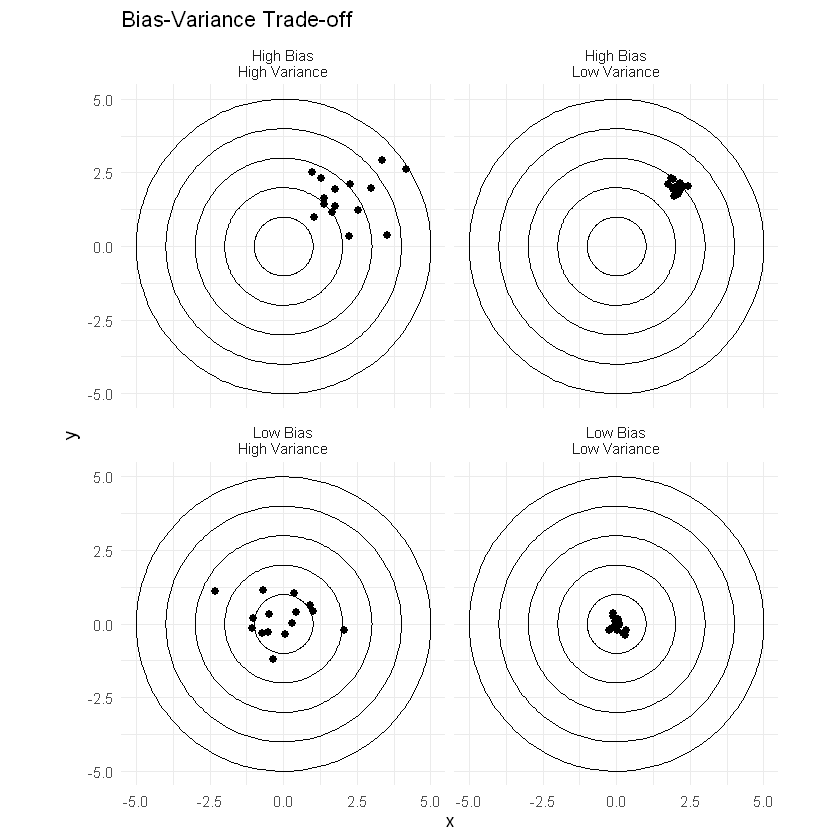

In [12]:
library(ggplot2)

# Function to make circles (targets)
make_circles <- function(radii = 1:5, npoints = 200) {
  circles <- data.frame()
  for (r in radii) {
    theta <- seq(0, 2*pi, length.out=npoints)
    circles <- rbind(circles,
                     data.frame(x = r*cos(theta),
                                y = r*sin(theta),
                                r = r))
  }
  circles
}

targets <- make_circles()

set.seed(123)
points_df <- rbind(
  # Low Bias, Low Variance
  data.frame(x=rnorm(15,0,0.2), y=rnorm(15,0,0.2), case="Low Bias\nLow Variance"),
  
  # High Bias, Low Variance
  data.frame(x=rnorm(15,2,0.2), y=rnorm(15,2,0.2), case="High Bias\nLow Variance"),
  
  # Low Bias, High Variance
  data.frame(x=rnorm(15,0,1), y=rnorm(15,0,1), case="Low Bias\nHigh Variance"),
  
  # High Bias, High Variance
  data.frame(x=rnorm(15,2,1), y=rnorm(15,2,1), case="High Bias\nHigh Variance")
)

# Plot
ggplot() +
  geom_path(data=targets, aes(x,y,group=r), color="black") +
  geom_point(data=points_df, aes(x,y), size=2) +
  coord_fixed() +
  facet_wrap(~case, ncol=2) +
  theme_minimal() +
  labs(title="Bias-Variance Trade-off")


## Summary

| **Metric**               | **Formula**                         | **Range** | **Meaning**                                                     |
| ------------------------ | ----------------------------------- | --------- | --------------------------------------------------------------- |
| **Accuracy**             | $\frac{TP + TN}{TP + TN + FP + FN}$ | 0 – 1     | Overall proportion of correct predictions                       |
| **Error Rate**           | $\frac{FP + FN}{TP + TN + FP + FN}$ | 0 – 1     | Overall proportion of incorrect predictions                     |
| **Precision**            | $\frac{TP}{TP + FP}$                | 0 – 1     | Of predicted positives, how many are actually positive (low FP) |
| **Recall (Sensitivity)** | $\frac{TP}{TP + FN}$                | 0 – 1     | Of actual positives, how many are correctly predicted (low FN)  |
| **Specificity**          | $\frac{TN}{TN + FP}$                | 0 – 1     | Of actual negatives, how many are correctly predicted (low FP)  |
